In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
#df = sns.load_dataset("diamonds")
v1 = np.array([1,3,6, np.nan, 12, np.nan, 3, 5, 12, np.nan])
v2 = np.array([4,np.nan,2,6,14,np.nan,3,45,4,23])
v3 = np.array([3,6,2,63,3,np.nan,np.nan, 2,np.nan,54])

df = pd.DataFrame( {"V1": v1,
                    "V2": v2,
                    "V3": v3})

In [32]:
df

,V1,V2,V3
0,1.0,4.0,3.0
1,3.0,NaN,6.0
2,6.0,2.0,2.0
3,NaN,6.0,63.0
4,12.0,14.0,3.0
5,NaN,NaN,NaN
6,3.0,3.0,NaN
7,5.0,45.0,2.0
8,12.0,4.0,NaN
9,NaN,23.0,54.0


In [33]:
df.isnull().any()

V1    True
V2    True
V3    True
dtype: bool

In [34]:
df.isnull().sum()

V1    3
V2    2
V3    3
dtype: int64

eksik veri gorsellestirme

In [35]:
!pip install missingno

In [36]:
import missingno as msno

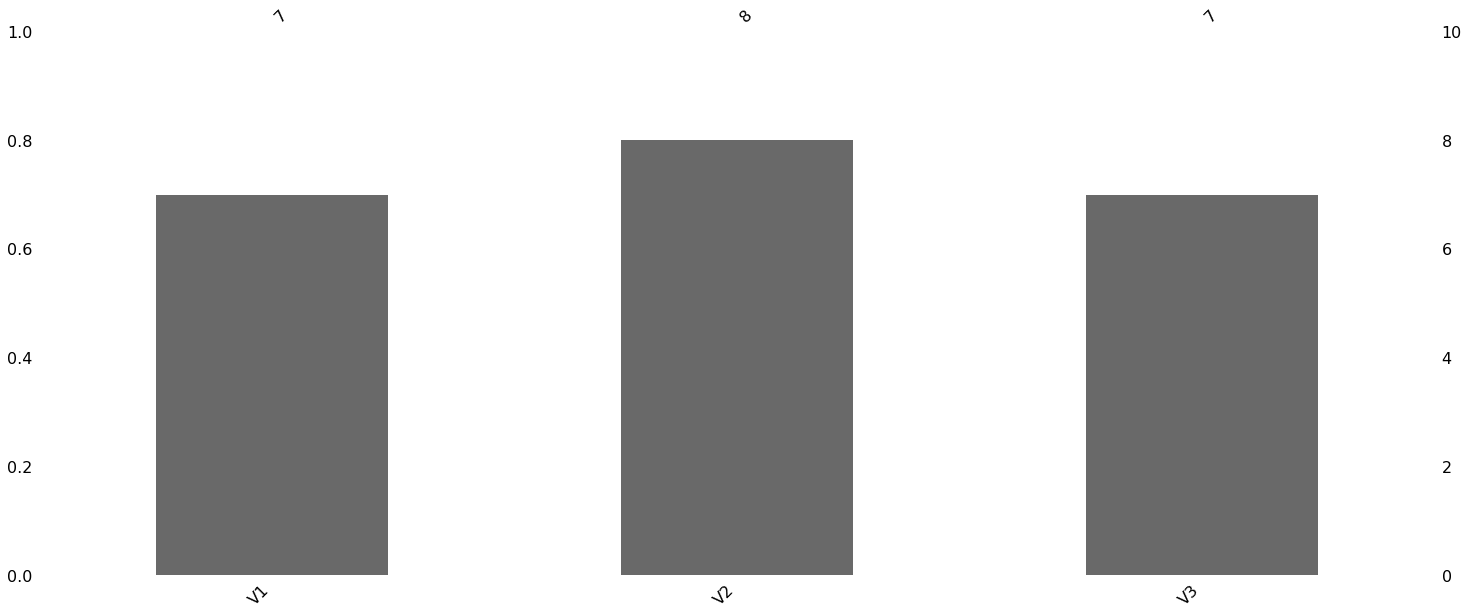

In [37]:
msno.bar(df);

<AxesSubplot:>

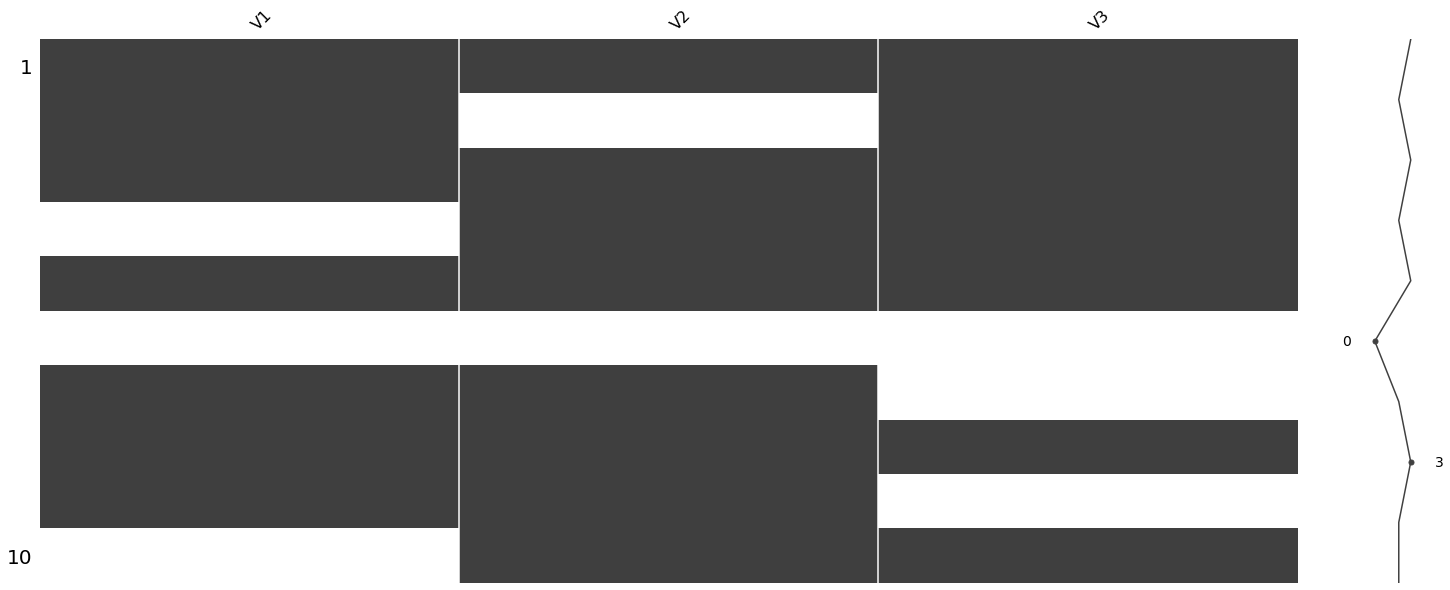

In [46]:
msno.matrix(df)

<AxesSubplot:>

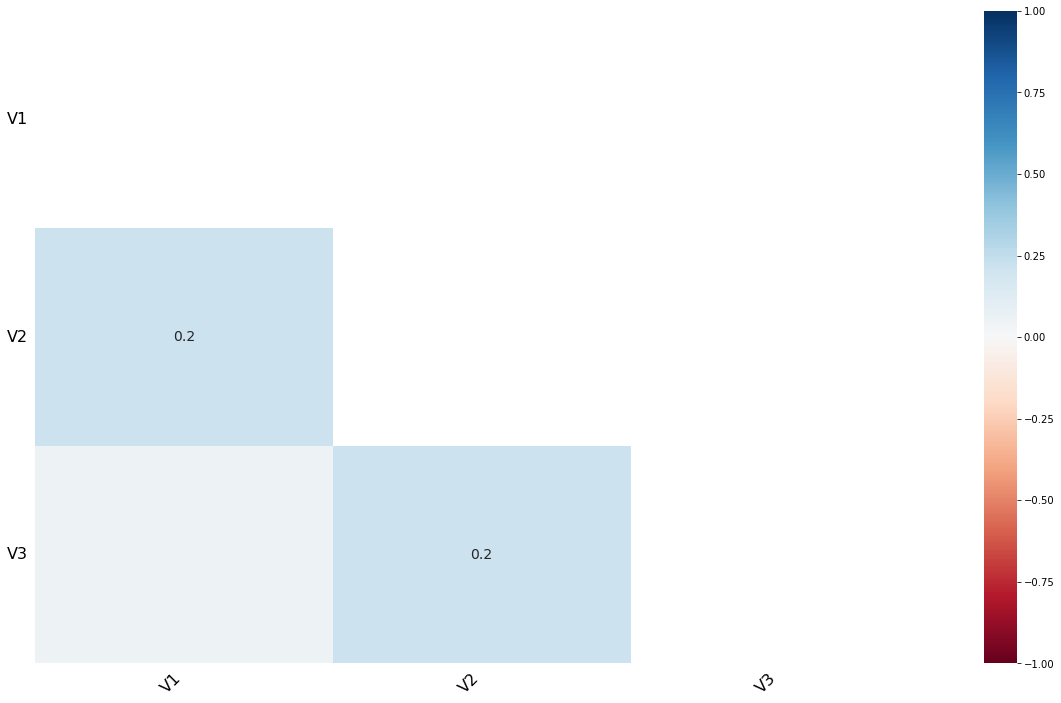

In [49]:
msno.heatmap(df)

In [42]:
df2 = sns.load_dataset("planets")

In [44]:
df2.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<AxesSubplot:>

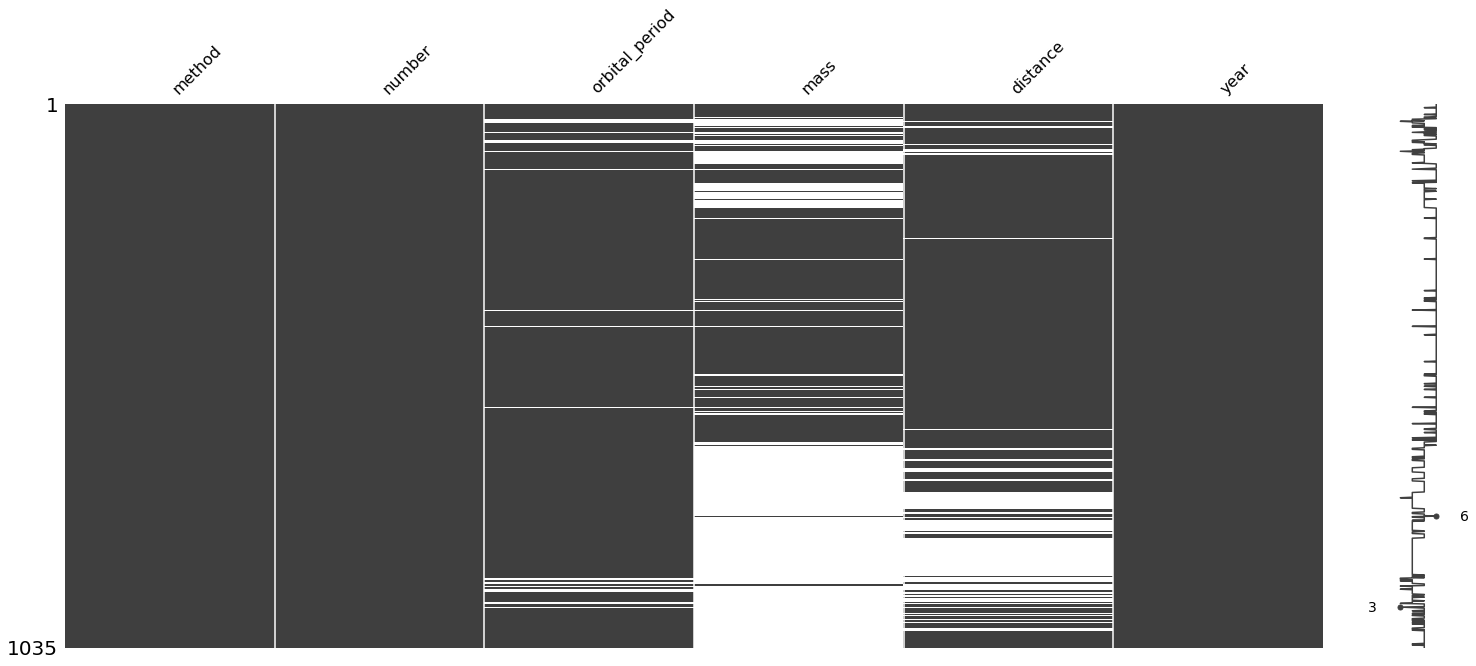

In [48]:
msno.matrix(df2)

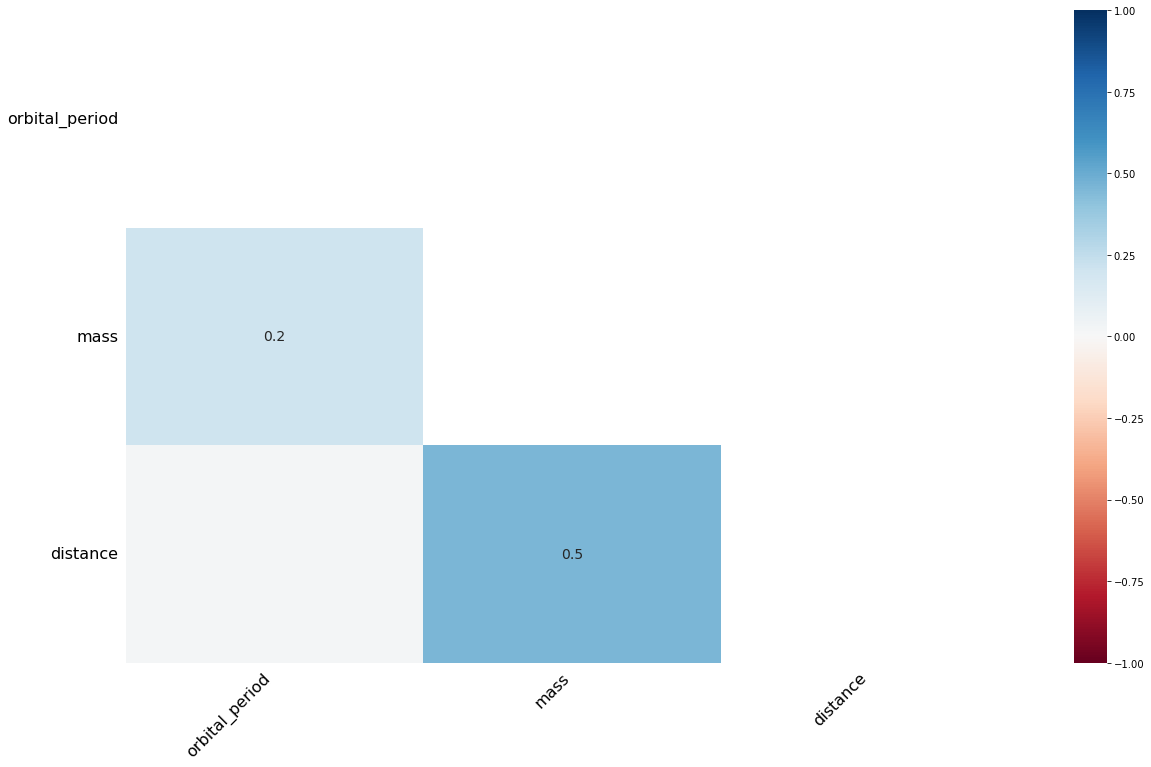

In [52]:
msno.heatmap(df2);

# eksik veri silme/doldurma

## silme yöntemi

In [54]:
df.dropna()
#içinde eksik veri ile olan tüm satırlar silinir

,V1,V2,V3
0,1.0,4.0,3.0
2,6.0,2.0,2.0
4,12.0,14.0,3.0
7,5.0,45.0,2.0


In [57]:
df.fillna(df.mean())
#içi ortalama ile dolduruldu

,V1,V2,V3
0,1.0,4.000,3.0
1,3.0,12.625,6.0
2,6.0,2.000,2.0
3,6.0,6.000,63.0
4,12.0,14.000,3.0
5,6.0,12.625,19.0
6,3.0,3.000,19.0
7,5.0,45.000,2.0
8,12.0,4.000,19.0
9,6.0,23.000,54.0


In [63]:
df.dropna(how= "all", axis = 0)
#tüm degerleri eksik veriden oluşan satır düşürülür

,V1,V2,V3
0,1.0,4.0,3.0
1,3.0,NaN,6.0
2,6.0,2.0,2.0
3,NaN,6.0,63.0
4,12.0,14.0,3.0
6,3.0,3.0,NaN
7,5.0,45.0,2.0
8,12.0,4.0,NaN
9,NaN,23.0,54.0


In [80]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [81]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [83]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64